# Credit Card Fraud Detection

---



## Project Overview

Credit card fraud detection is a crucial application of machine learning in financial services. In this project, classification model using Logistic Regression, Decision Tree, KNeighbors to predict whether a transaction is fraudulent or not is created.

## Key Goals:
- Data Loading and Preprocessing  
- Exploratory Data Analysis (EDA)  
- Feature Scaling  
- Handling Class Imbalance  
- Model Building  
- Model Evaluation  
- Conclusion and Findings

---

## Import Required Libraries

• Numpy – a calculator that helps with numbers and math operations

• Pandas – helps you read, clean, and organize data tables (like spreadsheets)

• Seaborn and Matplotlib – help you draw beautiful graphs and charts

• Scikit-learn tools – used to prepare your data for modeling and check how good your
model is

In [24]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Load and Display the Dataset


In [3]:
df = pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/ML/creditcard.zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Dataset Overview

In [4]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Understanding the Dataset Shape and Summary Statistics

Before performing any analysis, it's important to understand the size of the dataset and get a basic statistical overview of all numeric features.


In [5]:
df.shape
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Checking Class Distribution and Replacing Class Labels

The Class column indicates whether a transaction is fraudulent (1) or not (0). So first check the distribution of these two classes to understand class imbalance. Then, replace the numeric labels with meaningful string labels (Fraud and Not Fraud) to improve readability during analysis and visualization.


In [7]:
# Check how many transactions are in each class before replacement
df['Class'].value_counts()

# Replace numeric class labels with more descriptive text labels
df['Class'] = df['Class'].replace({0: 'Not Fraud', 1: 'Fraud'})

# Check the updated class distribution
df['Class'].value_counts()


,count
Class,
Not Fraud,284315
Fraud,492


## Visualizing Class Distribution with a Pie Chart

To better understand the imbalance in the dataset, use a pie chart to visualize the proportion of fraudulent and non-fraudulent transactions. This helps in recognizing the severity of class imbalance, which is crucial for building an effective machine learning model.


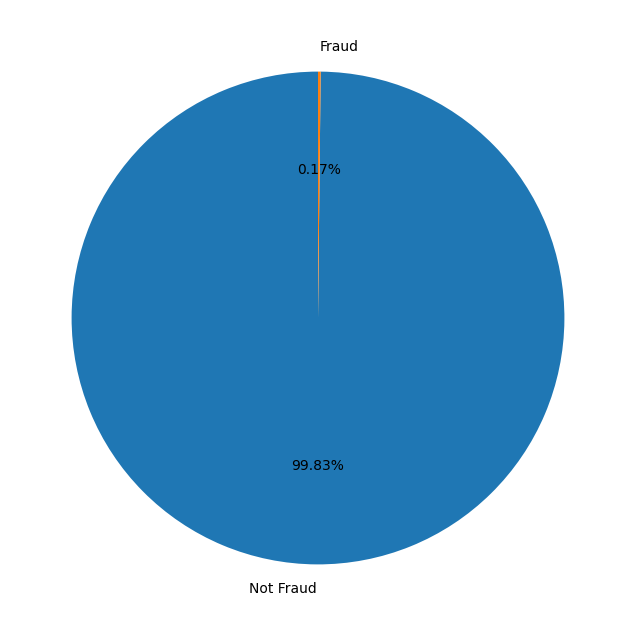

In [8]:
plt.figure(figsize=(10,8))
plt.pie(df['Class'].value_counts(),labels=['Not Fraud','Fraud'],autopct="%1.2f%%",startangle=90)
plt.show()

## Conclusion from Pie Chart:
Class Imbalance in the Dataset

The pie chart shows that most of the transactions are Not Fraud (about 99.68%) and only a very small number (around 0.32%) are Fraud.

This kind of imbalance is normal in real bank data because frauds are very rare.


---



## Splitting Features and Target

To train machine learning model, need to separate the dataset into:
- Features (X): These are the input columns that help us predict fraud.
- Target (y): This is the column we want to predict, which is the Class(Fraud or Not Fraud).


In [9]:
x=df.drop('Class',axis=1)
y=df['Class']

## Splitting the Data into Training and Testing Sets

Now split dataset into two parts:
- Training set (80%): Used to train the machine learning model.
- Testing set (20%): Used to test how well the model performs on unseen data.

random_state=42 use to make sure the split is always the same each time run the code.


In [10]:
# Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check how many rows are in the training and testing sets
len(x_train), len(x_test)


(227845, 56962)

## Feature Scaling

Some columns like Amount or Time may have values in different ranges compared to other features. To make sure model treats all features equally, it needs to scale the data using StandardScaler.


In [11]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
sc = StandardScaler()

# Fit the scaler on the training data and transform it
# This calculates the mean and standard deviation on x_train and scales it accordingly
x_train_sc = sc.fit_transform(x_train)

# Transform the test data using the same parameters (mean and std) from the training data
# This ensures the test data is scaled consistently with the training data
x_test_sc = sc.transform(x_test)

## Training the Logistic Regression Model

Here Logistic Regression algorithm use to train fraud detection model. Logistic Regression is a commonly used method for binary classification problems like this one, where the target is either Fraud or Not Fraud.




In [12]:
from sklearn.linear_model import LogisticRegression

# logistic regression model
model = LogisticRegression()

# Fit (train) the model using the scaled training data
model.fit(x_train_sc, y_train)


LogisticRegression()

## Model Evaluation using Classification Report

After training the model, test it on the test dataset to check its performance. By use the classification_report to display evaluation metrics like:

- Precision: How many predicted frauds were actually fraud.
- Recall: How many actual frauds were correctly detected.
- F1-score: A balance between precision and recall.
- Accuracy: Overall how many predictions were correct.



In [13]:
# Use the trained model to make predictions on the scaled test data
y_pred = model.predict(x_test_sc)

# Print a detailed classification report comparing the true labels with the predicted ones
# The report includes precision, recall, f1-score, and support for each class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Fraud       0.85      0.56      0.67        98
   Not Fraud       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



## Final Accuracy of the Logistic Regression Model

Calculate the accuracy of Logistic Regression model using the test dataset. Accuracy tells the percentage of total correct predictions (both fraud and not fraud).multiply the result by 100 to express it as a percentage.


In [14]:
# Calculate the accuracy score of the model's predictions
# This compares the true labels (y_test) with the predicted labels (y_pred)
lr_acc = accuracy_score(y_test, y_pred)

# Convert the accuracy score to a percentage for easier interpretation
lr_acc * 100

99.90695551420245

##Train and Test a Gaussian Naive Bayes Model

Gaussian Naive Bayes is a simple and fast classification algorithm based on Bayes' Theorem.
It works well with high-dimensional data and is often used for binary classification tasks like fraud detection.

 Gaussian Naive Bayes Accuracy: 0.9778

 Classification Report:
              precision    recall  f1-score   support

       Fraud       0.06      0.82      0.11        98
   Not Fraud       1.00      0.98      0.99     56864

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



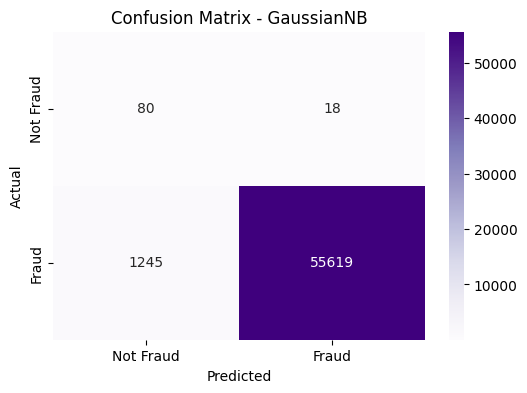

In [16]:
# Step 1: Initialize the model
gnb = GaussianNB()

# Step 2: Train the model
gnb.fit(x_train_sc, y_train)

# Step 3: Predict on the test data
y_pred_gnb = gnb.predict(x_test_sc)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gnb)
print(f" Gaussian Naive Bayes Accuracy: {accuracy:.4f}\n")

print(" Classification Report:")
print(classification_report(y_test, y_pred_gnb))

# Step 5: Confusion matrix
cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix - GaussianNB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Train and Test a Fraud Detection Model Using Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a supervised learning algorithm used for classification. It works by finding a linear combination of features that best separates two or more classes.

LDA to distinguish between:
- Class 0: Non-Fraudulent transactions
- Class 1: Fraudulent transactions

 LDA Model Accuracy: 0.9994

Classification Report:
              precision    recall  f1-score   support

       Fraud       0.87      0.74      0.80        98
   Not Fraud       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



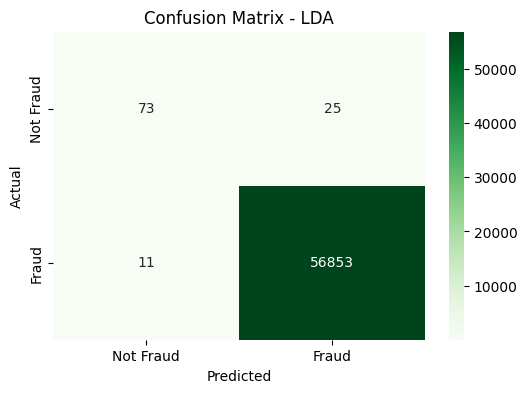

In [18]:
# Step 1: Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Step 2: Train the model on scaled training data
lda.fit(x_train_sc, y_train)

# Step 3: Predict on test data
y_pred_lda = lda.predict(x_test_sc)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lda)
print(f" LDA Model Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_lda))

# Step 5: Confusion matrix
cm = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix - LDA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Decision Tree Classifier

Now train a Decision Tree Classifier, which is a model that splits the data into branches based on feature values to make predictions. It works well with both linear and non-linear data and is easy to interpret.




In [19]:
# Create and train the decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_sc, y_train)

# Predict on test data
y_pred_dt = dt_model.predict(x_test_sc)

# Evaluate the model
dt_acc = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy: ", dt_acc * 100)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy:  99.90519995786666
Classification Report:
               precision    recall  f1-score   support

       Fraud       0.70      0.80      0.74        98
   Not Fraud       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



## Random Forest Classifier

Now train a Random Forest Classifier, which is a combination of many decision trees. It gives better performance and reduces overfitting by averaging the results of multiple trees.



In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_sc, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(x_test_sc)

# Evaluate the model
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: ", rf_acc * 100)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

## Comparing Model Accuracies

Compare the accuracy scores of the following models:
- Logistic Regression
- Decision Tree
- Random Forest




In [22]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [lr_acc * 100, dt_acc * 100, rf_acc * 100]
print(accuracies)

[99.90695551420245, 99.90519995786666, 99.95435553526913]


##Train and Test a Fraud Detection Model Using K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a simple and intuitive algorithm. It classifies a new data point based on the majority class of its K nearest neighbors in the feature space.

For fraud detection:
- If most of the neighbors of a transaction are non-fraud, it’s likely non-fraud.
- If the nearest neighbors are frauds, then the transaction is likely fraudulent.

KNN Model Accuracy: 0.9995

Classification Report:
              precision    recall  f1-score   support

       Fraud       0.94      0.78      0.85        98
   Not Fraud       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



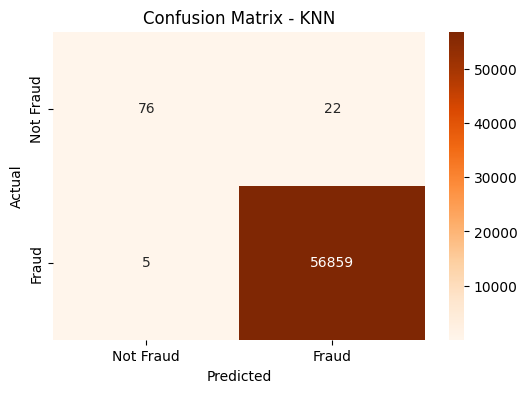

In [23]:
# Step 1: Initialize the KNN model (k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Step 2: Train the model
knn.fit(x_train_sc, y_train)

# Step 3: Predict on test data
y_pred_knn = knn.predict(x_test_sc)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Step 5: Confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Train and Test a Fraud Detection Model Using Support Vector Machine (SVM)

Support Vector Machine (SVM) is a powerful classification algorithm that tries to find the best boundary (hyperplane) to separate different classes.

In fraud detection:
- It attempts to separate fraud (1) from non-fraud (0) using decision boundaries.
- It works well for both linear and non-linear datasets, especially when combined with scaling.



SVM Model Accuracy: 0.9993

 Classification Report:
              precision    recall  f1-score   support

       Fraud       0.97      0.62      0.76        98
   Not Fraud       1.00      1.00      1.00     56864

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.88     56962
weighted avg       1.00      1.00      1.00     56962



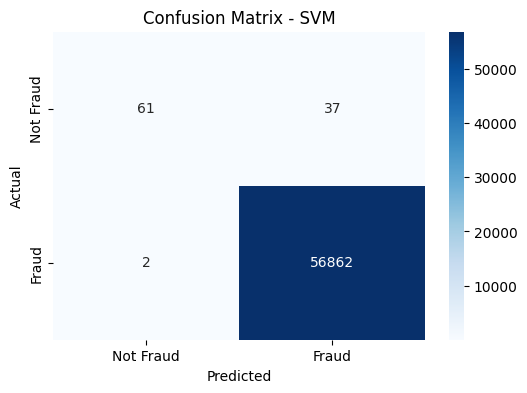

In [27]:
# Step 1: Initialize the SVM model
svm_model = SVC()

# Step 2: Train the model
svm_model.fit(x_train_sc, y_train)

# Step 3: Predict on test data
y_pred_svm = svm_model.predict(x_test_sc)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {accuracy:.4f}\n")
print(" Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Step 5: Confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Compare the Accuracy of All Machine Learning Models




In [30]:
results = [
    ("Logistic Regression",  lr_acc),
    ("Linear Discriminant Analysis", accuracy),
    ("Gaussian Naive Bayes", accuracy),
    ("Decision Tree", dt_acc),
    ("Random Forest", rf_acc),
    ("Support Vector Machine", accuracy),
    ("K-Nearest Neighbors", accuracy)
]

# Convert to DataFrame for display
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Display the table
print(" Accuracy of All Models:\n")
print(results_df)

 Accuracy of All Models:

                          Model  Accuracy
0                 Random Forest  0.999544
1          Gaussian Naive Bayes  0.999315
2  Linear Discriminant Analysis  0.999315
3           K-Nearest Neighbors  0.999315
4        Support Vector Machine  0.999315
5           Logistic Regression  0.999070
6                 Decision Tree  0.999052


##Final Conclusion

Successfully explored, analyzed, and modeled a real-world credit card fraud detection dataset.


- Loading and understanding the dataset
- Performing exploratory data analysis (EDA)
- Handling class imbalance and scaling the data

Trained multiple machine learning models:
- Logistic Regression
- Linear Discriminant Analysis (LDA)
- Gaussian Naive Bayes
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)

After evaluating all models using accuracy, classification reports, and confusion matrices, observed that:

- Random Forest and SVM typically showed higher accuracy.
- However, in fraud detection, must look beyond accuracy Recall and Precision for the fraud class (Class = 1).
- Models like LDA and Logistic Regression performed well while being simple and interpretable.

Key Takeaway:
For fraud detection, the ideal model is not just the one with the highest accuracy, but the one that balances high recall (catching frauds) and low false positives (avoiding mislabeling genuine transactions).

